In [1]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
import sys
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('./Dats.csv', encoding='latin-1')

In [3]:
data.shape

(1012, 17)

In [4]:
data.sample(5)

,url,url_length,port_on_url,special_character,duplicated_character,server_form_handler,abnormal_url,obfuscated_code,number_of_domain,number_of_third-party_domain,request_for_cookie,google_index,html_tags,keyword_in_js,obfuscated_js,payload_in_html,label
210,http://www.jeep.com/,Kurang dari 54,Tidak ada Port,Tidak ada special character,Tidak ada duplicated character,Mengarah ke domain berbeda,Tersimpan di database whois,Tidak obfuscated,Dua domain,Tidak ada third-party domain,Tidak ada request cookie,Halaman dan domain terdaftar,Tidak ada tags,Terdapat Keyword in Js,Tidak terdapat Obfus Js,Tidak terdapat Payload in HTML,non-XSS
82,http://users.skynet.be/wivani/lp/,Kurang dari 54,Tidak ada Port,Tidak ada special character,Tidak ada duplicated character,Mengarah ke domain berbeda,Tersimpan di database whois,Tidak obfuscated,Dua domain,Tidak ada third-party domain,Tidak ada request cookie,Halaman dan domain terdaftar,Tidak ada tags,Blanks,Blank,Blank atau Connection Time Out,non-XSS
864,http://www.orangecountync.gov/Email/MsgForm.as...,Lebih dari 75,Tidak ada Port,Tidak ada special character,Tidak ada duplicated character,Mengarah ke domain berbeda,Tersimpan di database whois,Ada obfuscated,Dua domain,Tidak ada third-party domain,Ada request cookie,Halaman tidak terdaftar di google index,Terdapat tags,Blanks,Blank,Blank atau Connection Time Out,XSS
955,http://www.xe.gr/search?System.type=xe_stelexo...,Lebih dari 75,Tidak ada Port,Terdapat special character,Tidak ada duplicated character,Blank atau CTO,Tidak tersimpan di database whois,Tidak obfuscated,Dua domain,Ada third-party domain,Tidak ada request cookie,Halaman tidak terdaftar di google index,Terdapat tags,Tidak terdapat Keyword in Js,Tidak terdapat Obfus Js,Tidak terdapat Payload in HTML,XSS
345,http://www.skarosser.se/,Kurang dari 54,Tidak ada Port,Tidak ada special character,Tidak ada duplicated character,Mengarah ke domain sendiri,Tersimpan di database whois,Tidak obfuscated,Dua domain,Tidak ada third-party domain,Tidak ada request cookie,Halaman dan domain terdaftar,Tidak ada tags,Tidak terdapat Keyword in Js,Tidak terdapat Obfus Js,Tidak terdapat Payload in HTML,non-XSS


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 17 columns):
url                             1012 non-null object
url_length                      1012 non-null object
port_on_url                     1012 non-null object
special_character               1012 non-null object
duplicated_character            1012 non-null object
server_form_handler             1012 non-null object
abnormal_url                    1012 non-null object
obfuscated_code                 1012 non-null object
number_of_domain                1012 non-null object
number_of_third-party_domain    1012 non-null object
request_for_cookie              1012 non-null object
google_index                    1012 non-null object
html_tags                       1012 non-null object
keyword_in_js                   1012 non-null object
obfuscated_js                   1012 non-null object
payload_in_html                 1012 non-null object
label                           1012 non-null

In [6]:
data.isnull().sum()

url                             0
url_length                      0
port_on_url                     0
special_character               0
duplicated_character            0
server_form_handler             0
abnormal_url                    0
obfuscated_code                 0
number_of_domain                0
number_of_third-party_domain    0
request_for_cookie              0
google_index                    0
html_tags                       0
keyword_in_js                   0
obfuscated_js                   0
payload_in_html                 0
label                           0
dtype: int64

In [7]:
data.describe()

,url,url_length,port_on_url,special_character,duplicated_character,server_form_handler,abnormal_url,obfuscated_code,number_of_domain,number_of_third-party_domain,request_for_cookie,google_index,html_tags,keyword_in_js,obfuscated_js,payload_in_html,label
count,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012
unique,1012,3,2,2,2,3,2,2,3,2,2,3,2,3,3,2,2
top,http://www.mclink.it/assoc/isp/fineng.html,Lebih dari 75,Tidak ada Port,Tidak ada special character,Tidak ada duplicated character,Blank atau CTO,Tersimpan di database whois,Tidak obfuscated,Dua domain,Tidak ada third-party domain,Tidak ada request cookie,Halaman tidak terdaftar di google index,Tidak ada tags,Blanks,Tidak terdapat Obfus Js,Tidak terdapat Payload in HTML,XSS
freq,1,557,996,639,933,429,923,567,723,923,894,491,584,451,557,561,602


In [8]:
data.drop_duplicates(keep=False,inplace=True)

In [9]:
data.describe().to_csv('datadescribe.csv')

In [10]:
#url tidak di convert ke numer
data['url'] = data['url'].astype('category')

In [11]:
obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head()

,url_length,port_on_url,special_character,duplicated_character,server_form_handler,abnormal_url,obfuscated_code,number_of_domain,number_of_third-party_domain,request_for_cookie,google_index,html_tags,keyword_in_js,obfuscated_js,payload_in_html,label
0,Kurang dari 54,Tidak ada Port,Tidak ada special character,Tidak ada duplicated character,Mengarah ke domain sendiri,Tersimpan di database whois,Tidak obfuscated,Dua domain,Tidak ada third-party domain,Tidak ada request cookie,Halaman dan domain terdaftar,Tidak ada tags,Tidak terdapat Keyword in Js,Tidak terdapat Obfus Js,Tidak terdapat Payload in HTML,non-XSS
1,Kurang dari 54,Tidak ada Port,Tidak ada special character,Tidak ada duplicated character,Mengarah ke domain berbeda,Tersimpan di database whois,Tidak obfuscated,Dua domain,Tidak ada third-party domain,Tidak ada request cookie,Halaman tidak terdaftar di google index,Tidak ada tags,Terdapat Keyword in Js,Terdapat Obfus Js,Tidak terdapat Payload in HTML,non-XSS
2,Antara 54 dan 75,Tidak ada Port,Tidak ada special character,Tidak ada duplicated character,Mengarah ke domain sendiri,Tidak tersimpan di database whois,Tidak obfuscated,Lebih dari dua domain,Tidak ada third-party domain,Tidak ada request cookie,Halaman dan domain terdaftar,Tidak ada tags,Tidak terdapat Keyword in Js,Tidak terdapat Obfus Js,Tidak terdapat Payload in HTML,non-XSS
3,Kurang dari 54,Tidak ada Port,Tidak ada special character,Tidak ada duplicated character,Blank atau CTO,Tersimpan di database whois,Tidak obfuscated,Satu domain,Tidak ada third-party domain,Tidak ada request cookie,Halaman dan domain terdaftar,Tidak ada tags,Blanks,Blank,Blank atau Connection Time Out,non-XSS
4,Kurang dari 54,Tidak ada Port,Tidak ada special character,Tidak ada duplicated character,Mengarah ke domain berbeda,Tersimpan di database whois,Tidak obfuscated,Satu domain,Tidak ada third-party domain,Tidak ada request cookie,Halaman dan domain terdaftar,Tidak ada tags,Tidak terdapat Keyword in Js,Terdapat Obfus Js,Tidak terdapat Payload in HTML,non-XSS


In [12]:
fitur = {'url_length':          {'Antara 54 dan 75':'0', 'Kurang dari 54':'1', 'Lebih dari 75':'2'},
         'port_on_url':         {'Tidak ada Port':'0', 'Terdapat port':'1'},
         'server_form_handler': {'Mengarah ke domain berbeda':'0', 'Mengarah ke domain sendiri':'1', 'Blank atau CTO':'2'},
         'abnormal_url':        {'Tersimpan di database whois':'0', 'Tidak tersimpan di database whois':'1'},
         'obfuscated_code':     {'Tidak obfuscated':'0', 'Ada obfuscated':'1'},
         'number_of_domain':    {'Satu domain':'0', 'Dua domain':'1', 'Lebih dari dua domain':'2'},
         'number_of_third-party_domain': {'Tidak ada third-party domain':'0', 'Ada third-party domain':'1'},
         'special_character':   {'Tidak ada special character':'0', 'Terdapat special character':'1'},
         'duplicated_character':{'Tidak ada duplicated character':'0', 'Terdapat duplicated character':'1'},
         'request_for_cookie':  {'Tidak ada request cookie':'0', 'Ada request cookie':'1'},
         'google_index':        {'Halaman tidak terdaftar di google index':'0', 'Halaman dan domain terdaftar':'1', 'Domain tidak terdaftar di google index':'2'},
         'html_tags':           {'Tidak ada tags':'0', 'Terdapat tags':'1'},
         'keyword_in_js':       {'Tidak terdapat Keyword in Js':'0', 'Terdapat Keyword in Js':'1', 'Blanks':'2'},
         'obfuscated_js':       {'Tidak terdapat Obfus Js':'0', 'Terdapat Obfus Js':'1', 'Blank':'2'},
         'payload_in_html':     {'Tidak terdapat Payload in HTML':'0', 'Terdapat Payload in HTML':'1', 'Blank atau Connection Time Out':'2'},
         'label':               {'non-XSS':'0', 'XSS':'1'}}

In [13]:
obj_df = obj_df.replace(fitur)
print(obj_df.shape)
obj_df

(1012, 16)


,url_length,port_on_url,special_character,duplicated_character,server_form_handler,abnormal_url,obfuscated_code,number_of_domain,number_of_third-party_domain,request_for_cookie,google_index,html_tags,keyword_in_js,obfuscated_js,payload_in_html,label
0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,0,0,1,1,0,2,0,0,1,0,0,0,0,0
3,1,0,0,0,2,0,0,0,0,0,1,0,2,2,2,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0,1,1,0,2,1,0,1,0,0,0,1,2,2,2,1
1008,2,1,1,0,2,0,0,2,0,1,0,1,2,2,2,1
1009,2,1,0,1,2,1,1,1,1,0,0,1,2,2,2,1
1010,2,1,1,0,1,0,0,1,0,1,0,1,2,2,2,1


In [14]:
obj_df["abnormal_url"].value_counts()

0    923
1     89
Name: abnormal_url, dtype: int64

In [15]:
obj_df['url_length'] = obj_df['url_length'].astype('int32')
obj_df['port_on_url'] = obj_df['port_on_url'].astype('int32')
obj_df['server_form_handler'] = obj_df['server_form_handler'].astype('int32')
obj_df['abnormal_url'] = obj_df['abnormal_url'].astype('int32')
obj_df['obfuscated_code'] = obj_df['obfuscated_code'].astype('int32')
obj_df['number_of_domain'] = obj_df['number_of_domain'].astype('int32')
obj_df['number_of_third-party_domain'] = obj_df['number_of_third-party_domain'].astype('int32')
obj_df['special_character'] = obj_df['special_character'].astype('int32')
obj_df['duplicated_character'] = obj_df['duplicated_character'].astype('int32')
obj_df['request_for_cookie'] = obj_df['request_for_cookie'].astype('int32')
obj_df['google_index'] = obj_df['google_index'].astype('int32')
obj_df['html_tags'] = obj_df['html_tags'].astype('int32')
obj_df['keyword_in_js'] = obj_df['keyword_in_js'].astype('int32')
obj_df['obfuscated_js'] = obj_df['obfuscated_js'].astype('int32')
obj_df['payload_in_html'] = obj_df['payload_in_html'].astype('int32')
obj_df['label'] = obj_df['label'].astype('int32')

In [16]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 0 to 1011
Data columns (total 16 columns):
url_length                      1012 non-null int32
port_on_url                     1012 non-null int32
special_character               1012 non-null int32
duplicated_character            1012 non-null int32
server_form_handler             1012 non-null int32
abnormal_url                    1012 non-null int32
obfuscated_code                 1012 non-null int32
number_of_domain                1012 non-null int32
number_of_third-party_domain    1012 non-null int32
request_for_cookie              1012 non-null int32
google_index                    1012 non-null int32
html_tags                       1012 non-null int32
keyword_in_js                   1012 non-null int32
obfuscated_js                   1012 non-null int32
payload_in_html                 1012 non-null int32
label                           1012 non-null int32
dtypes: int32(16)
memory usage: 71.2 KB


In [17]:
obj_df.describe()

,url_length,port_on_url,special_character,duplicated_character,server_form_handler,abnormal_url,obfuscated_code,number_of_domain,number_of_third-party_domain,request_for_cookie,google_index,html_tags,keyword_in_js,obfuscated_js,payload_in_html,label
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,1.485178,0.015810,0.368577,0.078063,1.148221,0.087945,0.439723,1.127470,0.087945,0.116601,0.790514,0.422925,1.161067,0.895257,0.891304,0.594862
std,0.616921,0.124803,0.482657,0.268404,0.823593,0.283354,0.496599,0.519221,0.283354,0.321103,0.847168,0.494268,0.839638,0.993001,0.994567,0.491162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000


In [18]:
obj_df.describe().to_csv('dataconvdescribe.csv')

In [23]:
numerical_vars = ['url_length', 'port_on_url', 'abnormal_url','obfuscated_code', 
                  'number_of_domain','number_of_third-party_domain',
                  'special_character', 'duplicated_character',
                  'request_for_cookie', 'google_index', 'html_tags',
                  'payload_in_html','keyword_in_js','obfuscated_js', 'server_form_handler','label']

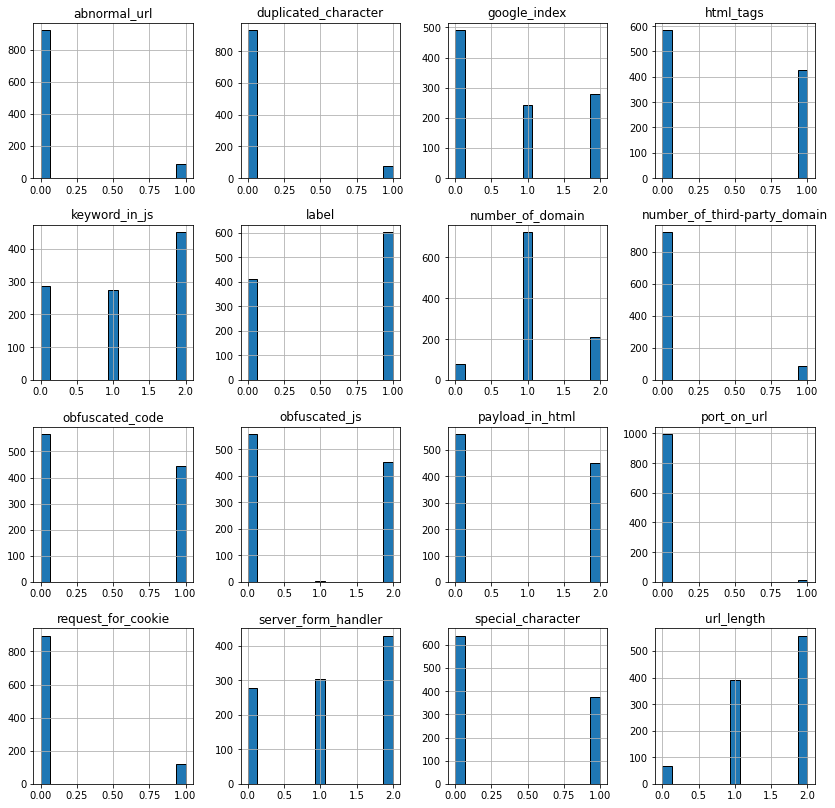

In [24]:
obj_df[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 14))
plt.savefig('count_value_barchart.png')

In [25]:
total = data.isnull().sum().sort_values(ascending=False)

percent = (obj_df.isnull().sum()/obj_df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)

missing_data

,Total,Missing Percent
abnormal_url,0,0.0
duplicated_character,0,0.0
google_index,0,0.0
html_tags,0,0.0
keyword_in_js,0,0.0
label,0,0.0
number_of_domain,0,0.0
number_of_third-party_domain,0,0.0
obfuscated_code,0,0.0
obfuscated_js,0,0.0


In [26]:
data['url'].duplicated().sum()

0

In [27]:
obj_df.duplicated().sum()

582

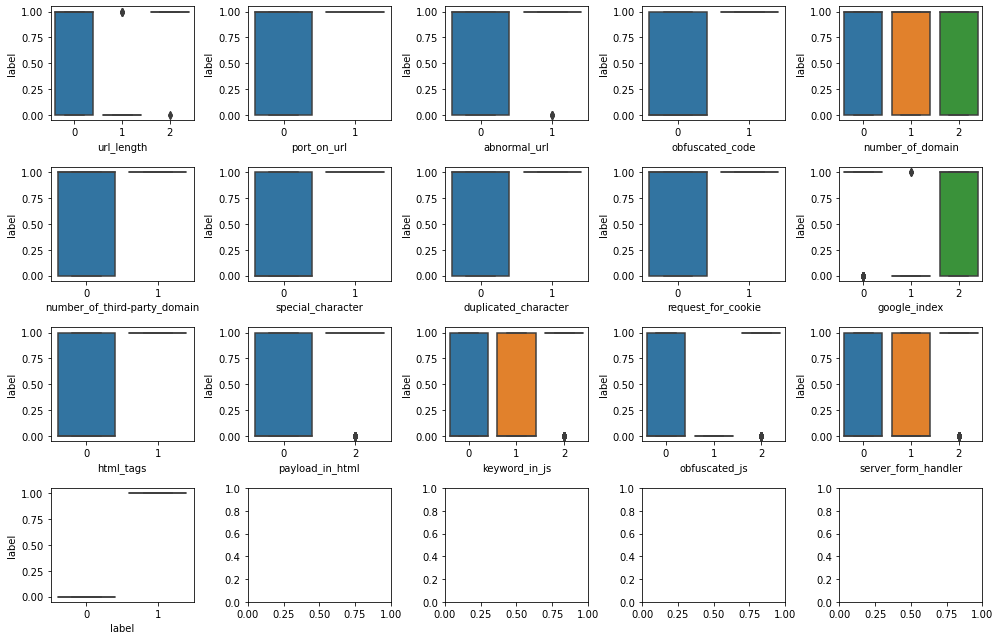

In [28]:
fig, ax = plt.subplots(4,5, figsize=(14,9))
for var, subplot in zip(data[numerical_vars], ax.flatten()):
    sns.boxplot(x=var, y='label', data=obj_df, ax=subplot)
    
fig.tight_layout()
fig.savefig('count_value_boxplot.png')

# Data Reduction

In [29]:
X = obj_df.iloc[:,0:14]
y = obj_df.iloc[:,14]

bestfeatures = SelectKBest(score_func=chi2, k = 'all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Value'] 
print(featureScores.nlargest(14,'Value'))

                         Feature        Value
13                 obfuscated_js  1109.095875
12                 keyword_in_js   493.163805
4            server_form_handler   123.320130
6                obfuscated_code    88.585367
11                     html_tags    80.503162
2              special_character    62.305631
5                   abnormal_url    33.988495
0                     url_length    31.520638
9             request_for_cookie    23.931863
3           duplicated_character    22.153830
1                    port_on_url    11.938785
8   number_of_third-party_domain     6.922256
10                  google_index     4.713572
7               number_of_domain     0.021980


In [30]:
featureScores = featureScores.set_index('Feature')

<AxesSubplot:xlabel='Feature'>

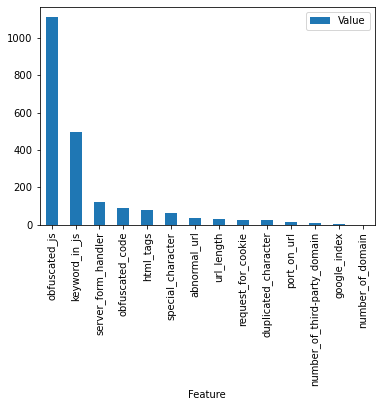

In [31]:
featureScores.sort_values(by = 'Value', ascending = False , inplace = True)
featureScores.plot(kind='bar')

# Korelasi Atribut

In [28]:
corr = obj_df.corr()
corr.head()

,url_length,port_on_url,special_character,duplicated_character,server_form_handler,abnormal_url,obfuscated_code,number_of_third-party_domain,request_for_cookie,google_index,html_tags,keyword_in_js,obfuscated_js,payload_in_html,label
url_length,1.000000,0.080128,0.488408,0.177240,0.272978,0.072535,0.655715,0.180044,0.238419,-0.214129,0.516883,0.309184,0.346221,0.348804,0.727696
port_on_url,0.080128,1.000000,0.116631,0.051703,0.073409,0.072523,0.079230,0.072523,0.102045,-0.080906,0.115983,0.107823,0.109152,0.109484,0.104598
special_character,0.488408,0.116631,1.000000,0.266335,0.307832,0.102675,0.297054,0.044816,0.092591,-0.183511,0.651982,0.253644,0.309707,0.312258,0.630518
duplicated_character,0.177240,0.051703,0.266335,1.000000,0.140010,-0.012324,0.209727,0.026692,-0.036857,-0.123760,0.153508,0.137270,0.153177,0.154093,0.240141
server_form_handler,0.272978,0.073409,0.307832,0.140010,1.000000,0.164487,0.237105,0.088195,0.058010,-0.020665,0.300231,0.371664,0.449565,0.454403,0.375998


<AxesSubplot:>

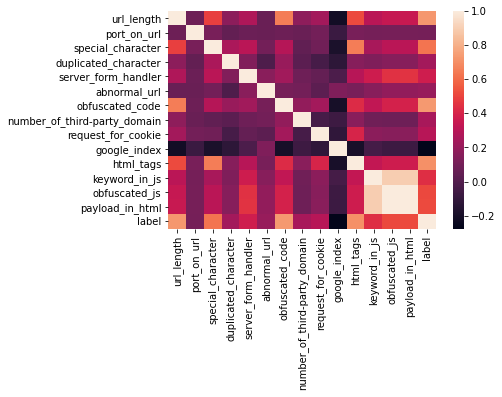

In [29]:
sns.heatmap(corr)

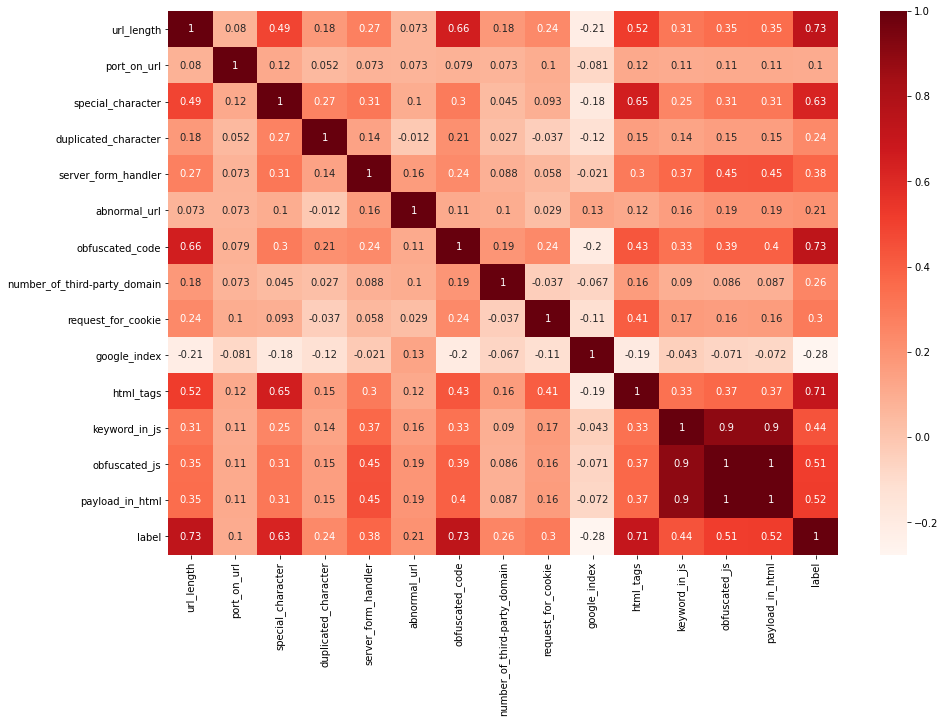

In [30]:
#pearson
plt.figure(figsize=(15,10))
cor = obj_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()